<a href="https://colab.research.google.com/github/kukrejamanal/DAV_69/blob/main/69_EXP_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline


In [11]:
dataset = pd.read_csv('/content/jobs_in_data.csv')
dataset.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [12]:
dataset.tail()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S
9354,2020,Business Data Analyst,Data Analysis,USD,100000,100000,United States,Entry-level,Contract,Remote,United States,L


In [13]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
work_year,9355.0,2022.760449,0.519470,2020.0,2023.0,2023.0,2023.0,2023.0
salary,9355.0,149927.981293,63608.835387,14000.0,105200.0,143860.0,187000.0,450000.0
salary_in_usd,9355.0,150299.495564,63177.372024,15000.0,105700.0,143000.0,186723.0,450000.0


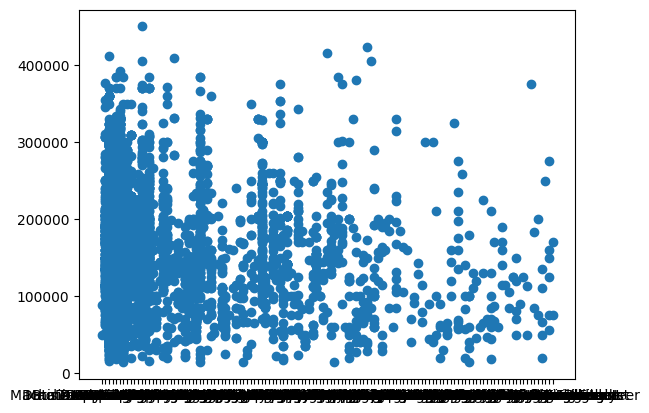

In [14]:
plt.scatter(dataset['job_title'], dataset['salary'])

(array([2260.,  259., 3014., 1428., 1457.,  503.,  313.,   55.,   61.,
           5.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

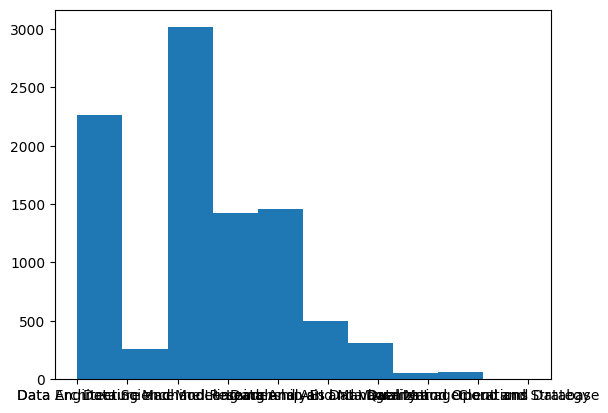

In [15]:
plt.hist(dataset ["job_category"])

In [17]:
model = LinearRegression()
model.fit(dataset["work_year"].values.reshape(-1, 1), dataset["salary"])

LinearRegression()

Text(0.01, 0.9, 'y = -39655207.284 + 19678.621 * x')

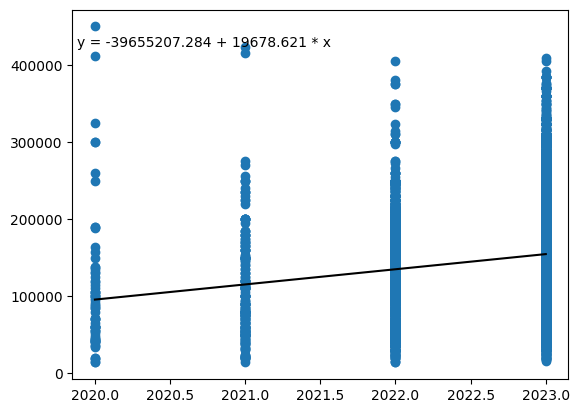

In [18]:
y_pred = model.predict(dataset["work_year"].values.reshape(-1, 1))
plt.scatter(dataset['work_year'], dataset['salary'])
plt.plot(dataset["work_year"], y_pred, color="Black")
plt.text(0.01, 0.9, f"y = {round(model.intercept_, 3)} + {round(model.coef_[0], 3)} * x", transform=plt.gca().transAxes)

In [1]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
df <- read.csv("jobs_in_data.csv")

In [4]:
dataset = select(df,c("salary", "work_year"))
head(dataset)

,salary,work_year
,<int>,<int>
1,88000,2023
2,186000,2023
3,81800,2023
4,212000,2023
5,93300,2023
6,130000,2023


In [5]:
summary(dataset)

     salary         work_year   
 Min.   : 14000   Min.   :2020  
 1st Qu.:105200   1st Qu.:2023  
 Median :143860   Median :2023  
 Mean   :149928   Mean   :2023  
 3rd Qu.:187000   3rd Qu.:2023  
 Max.   :450000   Max.   :2023  

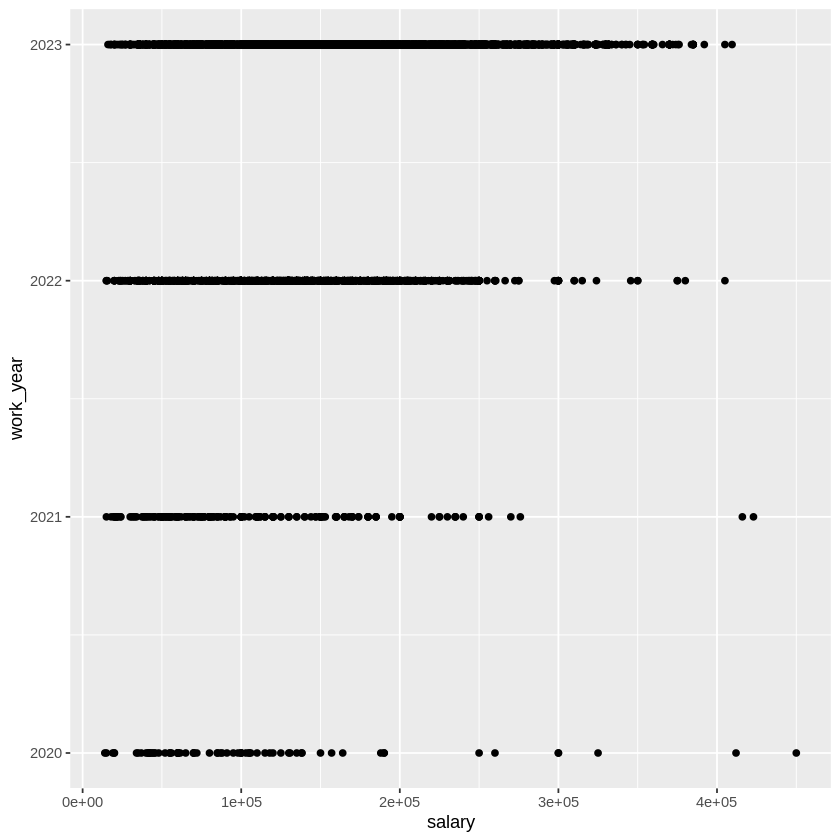

In [6]:
ggplot(df, aes(x=salary, y=work_year)) +
    geom_point()

In [7]:
model = lm(work_year ~ salary, data=df)
summary(model)


Call:
lm(formula = work_year ~ salary, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.15428  0.09509  0.21531  0.27752  0.41532 

Coefficients:
             Estimate Std. Error   t value Pr(>|t|)    
(Intercept) 2.023e+03  1.357e-02 149003.64   <2e-16 ***
salary      1.312e-06  8.335e-08     15.75   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5127 on 9353 degrees of freedom
Multiple R-squared:  0.02583,	Adjusted R-squared:  0.02572 
F-statistic:   248 on 1 and 9353 DF,  p-value: < 2.2e-16


In [8]:
pred <- predict(model, data = df$salary)

[1] "y = 2022.563677 + 0.000001 * x"

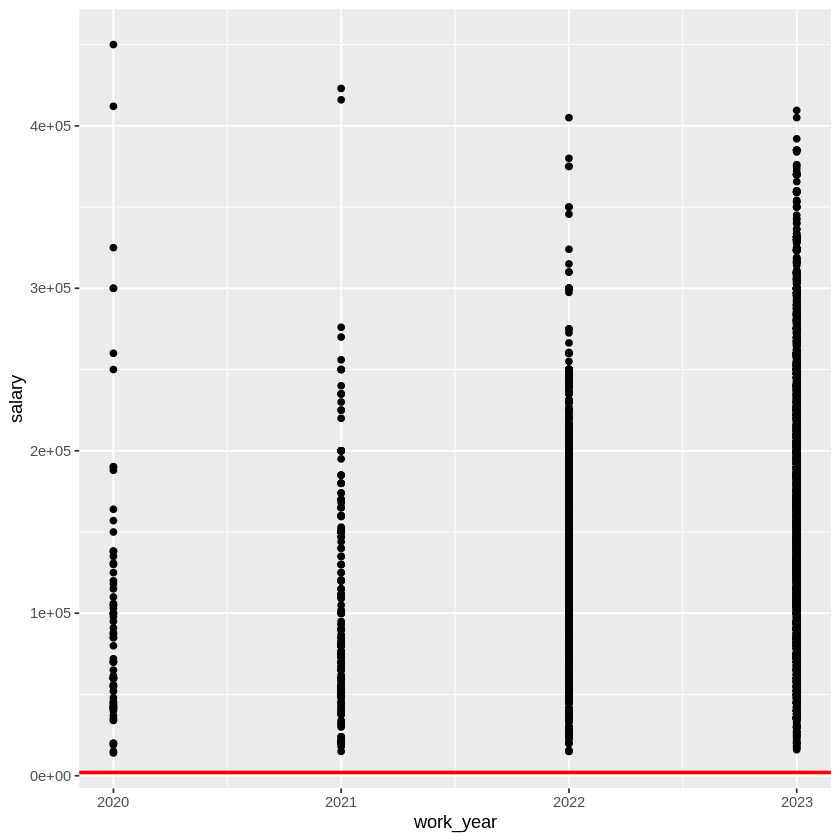

In [9]:
ggplot(df, aes(x=work_year, y=salary)) +
    geom_point() +
      geom_abline(slope=model$coefficients[2],
              intercept=model$coefficients[1],
              color="Red",
              linewidth=1)
sprintf("y = %f + %f * x", model$coefficients[1], model$coefficients[2])